# Pyber

#1.- In the Urban cities there are more drivers available than in the rural ones but the the rides are much more expensive in the rural ones. This have to be because we have less drivers available.
#2.-The fare share is mostly in the Urban cities with the 62.7%
#3.- Also is it important to know that the market is in the Urban citites so if someone wants to be a drivers should be working in Urban cities and then in the suburban.

In [203]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
cd =pd.read_csv(city_data)
rd = pd.read_csv(ride_data)

#create de Data Frames
cd_data = pd.DataFrame(cd)
rd_data = pd.DataFrame(rd)

# Combine the data into a single dataset
merge_table = pd.merge(rd_data, cd_data, on="city")
#Delete the date column and display the data table for preview
merge_table.drop("date", axis=1, inplace=True)
merge_table = merge_table.set_index('city')

merge_table = merge_table.groupby('city').mean()
cd_data = cd_data.set_index('city')
rd_data = rd_data.set_index('city')
merge_table

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Barronchester,36.422500,4.460796e+12,11.0
Bethanyland,32.956111,5.842550e+12,22.0
Bradshawfurt,40.064000,3.735294e+12,7.0
Brandonfort,35.437368,5.429539e+12,10.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Colemanland,30.894545,5.155714e+12,23.0


In [204]:
#Average of fare
avfare = pd.DataFrame(merge_table['fare'])

#number of rides per city
numrides = rd_data.groupby(['city']).count()
numrides_percity = pd.DataFrame(numrides['ride_id'])

#driver count per city
drivcount = pd.DataFrame(merge_table['driver_count'])
#drivcount

#cityTypes
citytypes = pd.DataFrame(cd_data['type'])
#citytypes


In [205]:
#Merge Bubble plot data
mt = pd.merge(avfare, numrides_percity, on="city")
mt2 = pd.merge(mt,drivcount, on = 'city')
bubbleplotdata = pd.merge(mt2,citytypes, on = 'city')


In [206]:
bubbleplotdata = bubbleplotdata.rename(columns={'fare' : 'Average Fare ($)',
                                   'ride_id' : 'Total Number of Rides (Per City)',
                                   'driver_count' : 'driver count per city',
                                   'type' : 'City Types'})
bubbleplotdata

,Average Fare ($),Total Number of Rides (Per City),driver count per city,City Types
city,,,,
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural
Brandonfort,35.437368,19,10.0,Suburban
Carriemouth,28.314444,27,52.0,Urban
Christopherfurt,24.501852,27,41.0,Urban
Colemanland,30.894545,22,23.0,Suburban


## Bubble Plot of Ride Sharing Data

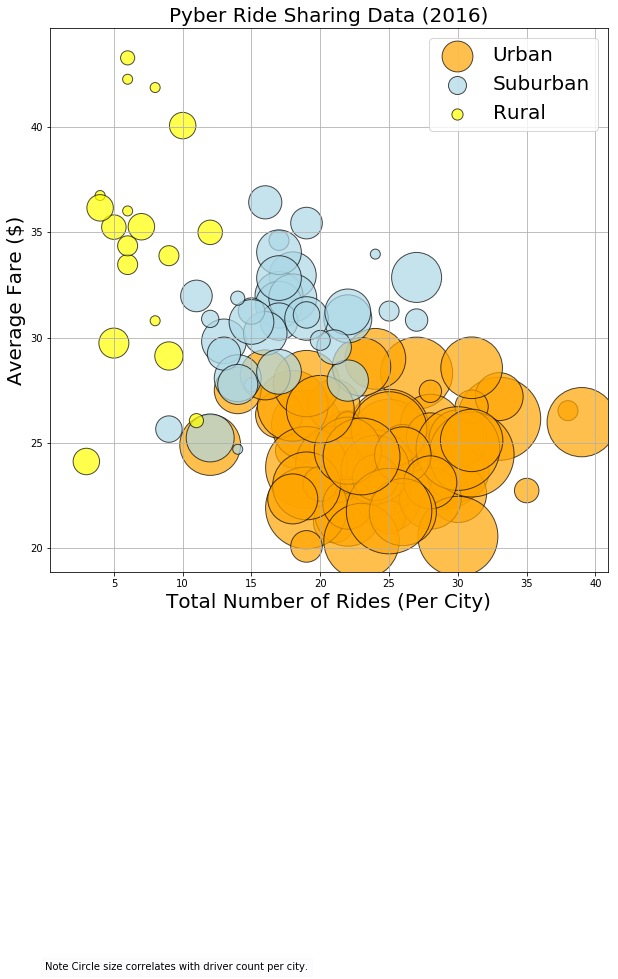

In [207]:
# Obtain the x and y coordinates for each of the three city types
urban = bubbleplotdata.loc[bubbleplotdata['City Types'] == 'Urban', :]
suburban = bubbleplotdata.loc[bubbleplotdata['City Types'] == 'Suburban', :]
rural = bubbleplotdata.loc[bubbleplotdata['City Types'] == 'Rural', :]


# Set area of markers proportional to driver count
a1 = urban['driver count per city'] *100
a2 = suburban['driver count per city'] *100
a3 = rural['driver count per city'] *100

# Build the scatter plots for each city types
ax1 = urban.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=a1, color='orange', edgecolor='black', alpha=0.7, label='Urban', figsize=(10,10))    
ax2 = suburban.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=a2, color='lightblue', edgecolor='black', alpha=0.7, ax=ax1, label='Suburban')    
ax3 = rural.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=a3, color='yellow', edgecolor='black', alpha=0.7, ax=ax1, label='Rural')

# Incorporate the other graph properties

plt.grid()
plt.title('Pyber Ride Sharing Data (2016)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=20)

# Create a legend
plt.legend(fontsize=20, markerscale=0.5)
# Incorporate a text label regarding circle size
note = "Note Circle size correlates with driver count per city."

plt.text(0, 0, note, bbox = dict(color='b', alpha=0.01))

# Save Figure
plt.savefig('bubbleplot.png',bbox_inches='tight')

# Show plot
plt.show()

## Total Fares by City Type

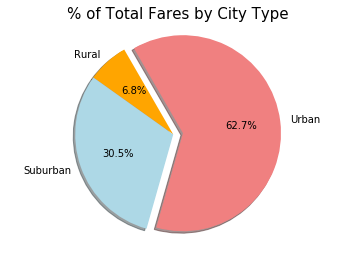

In [208]:
# Calculate Type Percents
merge_table2 = pd.merge(rd_data, cd_data, on="city")

#Delete the date column and display the data table for preview
merge_table2.drop("date", axis=1, inplace=True)
merge_table2 = merge_table2.groupby('city').sum()

#cityTypes
citytypes = pd.DataFrame(cd_data['type'])

PieChartData = pd.merge(merge_table2, citytypes, on="city")
PieChartData = PieChartData.groupby('type').sum()
PieChartData


colors = ["orange", "lightblue", "lightcoral"]
labels = ["Rural", "Suburban","Urban"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(PieChartData['fare'],explode = explode, labels=labels,colors = colors, autopct = "%1.1f%%",shadow=True,startangle = 120)
plt.axis("equal")
plt.title('% of Total Fares by City Type', fontsize=15)

# Save Figure
plt.savefig('Farepieplot.png',bbox_inches='tight')

# Show plot
plt.show()

## Total Rides by City Type

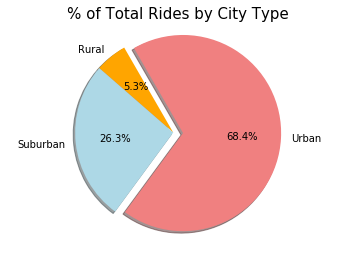

In [209]:
# Calculate Rides Percents
ridespercity = bubbleplotdata.groupby('City Types').sum()
ridespercity
colors = ["orange", "lightblue", "lightcoral"]
labels = ["Rural", "Suburban","Urban"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(ridespercity['Total Number of Rides (Per City)'],explode = explode, labels=labels,colors = colors, autopct = "%1.1f%%",shadow=True,startangle = 120)
plt.axis("equal")
plt.title('% of Total Rides by City Type', fontsize=15)

# Save Figure
plt.savefig('Ridepieplot.png',bbox_inches='tight')

# Show plot
plt.show()

## Total Drivers by City Type

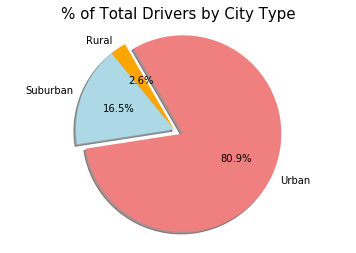

In [210]:
# Calculate Drivers pecents
ridespercity = bubbleplotdata.groupby('City Types').sum()
ridespercity
colors = ["orange", "lightblue", "lightcoral"]
labels = ["Rural", "Suburban","Urban"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(ridespercity['driver count per city'],explode = explode, labels=labels,colors = colors, autopct = "%1.1f%%",shadow=True,startangle = 120)
plt.axis("equal")
plt.title('% of Total Drivers by City Type', fontsize=15)

# Save Figure
plt.savefig('Ridepieplot.png',bbox_inches='tight')

# Show plot
plt.show()